In [3]:
import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math # for sqrt

# We will use a library that I created for you
import os # To import external python files
import sys# To import external python files
sys.path.insert(0,os.path.abspath('../../course_library') ) # Replace this
                                                            # with the correct
                                                            # path

In [4]:
dataset_to_use = 'A'
mydatasets_folder = "/home/araldo/datasets"
df = pd.read_csv(mydatasets_folder +'/video-qoe-processed/df.'+
                 dataset_to_use+'_2.csv')

In [5]:
df.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372,79344,192.168.1.190,173.194.55.23,QUIC,29,57,...,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625,52973,192.168.1.190,74.125.155.199,QUIC,4,36,...,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056,34178,192.168.1.190,74.125.155.201,TCP,16,23,...,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377,36821,192.168.1.190,172.217.135.40,0,0,0,...,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900,104389,192.168.1.190,173.194.184.103,QUIC,9,77,...,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 207 columns):
RelativeTime           float64
PacketsSent            int64
PacketsReceived        int64
BytesSent              int64
BytesReceived          int64
IPSrc0                 object
IPDst0                 object
Protocol0              object
PacketsSent0           int64
PacketsReceived0       int64
BytesSent0             int64
BytesReceived0         int64
IPSrc1                 object
IPDst1                 object
Protocol1              object
PacketsSent1           int64
PacketsReceived1       int64
BytesSent1             int64
BytesReceived1         int64
IPSrc2                 object
IPDst2                 object
Protocol2              object
PacketsSent2           int64
PacketsReceived2       int64
BytesSent2             int64
BytesReceived2         int64
IPSrc3                 object
IPDst3                 object
Protocol3              object
PacketsSent3           int64
PacketsRec

Let's study the dependency between `label` and `KBytesReceived`

Let's first plot the data as they are, using a scatterplot.

See [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html) for more info (optional).

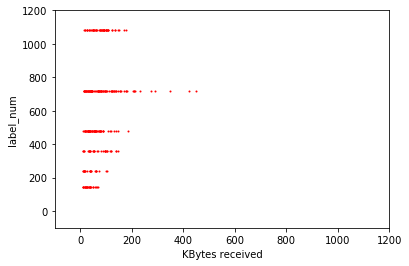

In [7]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(df['KBytesReceived'],df['label_num'],color='red',
           s=1, label='all samples') # ax is the actual figure

# Customize the plot
ax.set(xlim=[-100,1200], ylim=[-100,1200], ylabel="label_num",
      xlabel="KBytes received")

# Save it to the disk
fig.savefig('img/scatter.pdf')

In [8]:
df_train, df_test = train_test_split(df, test_size=0.3)
df_test.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
160,15.5,14,21,1131,26630,192.168.1.190,74.125.159.87,QUIC,13,19,...,True,26.630,q1080p,1080,3.282038,2.708050,3.091042,7.031741,10.189831,0.002729
167,3.1,0,24,0,14813,,NaN,0,0,0,...,True,14.813,q720p,720,2.695505,0.000000,3.218876,0.000000,9.603328,0.003689
207,5.2,9,69,882,96048,192.168.1.190,172.217.129.103,0,0,0,...,True,96.048,q360p,360,4.564848,2.302585,4.248495,6.783325,11.472614,0.004432
55,3.9,16,20,3933,13248,192.168.1.190,173.194.7.56,QUIC,2,6,...,True,13.248,q360p,360,2.583847,2.833213,3.044522,8.277412,9.491677,0.007357
233,3.3,0,158,0,170576,0,0,0,0,0,...,True,170.576,q720p,720,5.139181,0.000000,5.068904,0.000000,12.046942,0.005835


Let's split the dataset in 80% training set, 20% test set.

Try to run the code above multiple times.

What do you observe? Is it a problem? How do you solve it?

To achieve reproducibility, set the seed

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)
df_test.head()

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

Training samples  204 ; Test samples  88


## Univariate Linear Regression

**Goal**: Predict `label_num` based on `KBytesReceived`

In [10]:
df_train[['KBytesReceived','label_num']]

,KBytesReceived,label_num
246,57.072,480
249,36.236,144
79,80.736,720
275,109.903,720
131,19.628,144
108,86.304,1080
285,32.016,720
282,46.010,480
8,54.982,720
213,21.240,144


Let's separate the independent variables $X$ from the dependent variables $y$

In [11]:
X_train = df_train[['KBytesReceived'] ]
y_train = df_train['label_num']


# Do the same for the test dataset
X_test = df_test[[ 'KBytesReceived'] ]
y_test = df_test['label_num']

Let's train our first supervised learning model: an Ordinary Least Squares model.

In [12]:
print("X_train before\n", X_train)
X_train_c = sm.add_constant(X_train)# Add consant 1 as a 
                                    # first column of X matrix
print("\n\n\nX_train after\n", X_train)

X_train before
      KBytesReceived
246          57.072
249          36.236
79           80.736
275         109.903
131          19.628
108          86.304
285          32.016
282          46.010
8            54.982
213          21.240
172         121.104
227          37.656
31           48.720
161         157.178
55           13.248
230          43.094
222         100.771
159          46.066
48           60.221
225          40.368
197          50.112
272         140.025
33           25.056
93           79.808
223          18.096
35          150.336
194          13.920
63          102.972
29          209.564
0            79.344
..              ...
115         101.338
270          69.600
216          38.976
264         116.928
209          97.138
1            52.973
22          175.480
7            67.177
141         118.490
86          133.740
241          37.649
215          71.466
68           32.016
50           54.288
156          25.005
252          30.624
254          44.544
276 

In [13]:
model = sm.OLS(y_train, X_train_c).fit() # Training
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     11.62
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           0.000787
Time:                        18:37:05   Log-Likelihood:                -1440.1
No. Observations:                 204   AIC:                             2884.
Df Residuals:                     202   BIC:                             2891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            539.7538     30.322     17.801      0.000     479.965     599.543
KBytesReceived     1.0812      0.317      3.409      0.001       0.456       1.707
==============================================================================
Omnibus:                       20.276   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.525
Skew:                           0.325   Prob(JB):                      0.00854
Kurtosis:                       2.164   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we have a trained model $h_{\theta*}(\cdot)$ stored in `model`. We can use it to predict new values.

In [14]:
newKBytesReceivedSamples = np.array([257, 524, 613, 223])

# Models want matrices as input, while now we have a 1D array.
# We need to do the following
newKBytesReceivedSamples = newKBytesReceivedSamples.reshape(-1, 1)

newKBytesReceivedSamples_c = sm.add_constant(newKBytesReceivedSamples)


predictedLabels = model.predict(newKBytesReceivedSamples_c)
predictedLabels

array([ 817.61850048, 1106.29506067, 1202.52058073,  780.85818945])

To plot the model, we let it predict on an interval

In [15]:
interval = np.arange(-100,1200)
interval_c = sm.add_constant(interval)
h_values = model.predict(interval_c)
h_values

array([ 431.63523462,  432.71642024,  433.79760586, ..., 1833.93298202,
       1835.01416764, 1836.09535326])

Let's plot the model. It is constructed so to minimize the distance between the blue points (training samples) and the line

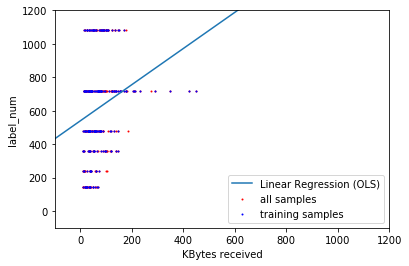

In [16]:
ax.scatter(X_train,y_train,color='blue',s=1, 
           label="training samples")

ax.plot(interval,h_values, label="Linear Regression (OLS)")
ax.legend()

fig.savefig('img/QoE-prediction-OLS.pdf')
fig

Let's evaluate the model on the test set

In [17]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)

Let us compare the true test labels and the predicted

In [18]:
pd.DataFrame({'true':y_test,'pred':y_pred})

,true,pred
132,360,642.739970
267,144,607.479264
266,720,676.036163
62,720,643.349759
110,720,584.895458
27,720,641.653379
91,480,601.459222
189,720,633.064440
85,1080,622.759660
164,1080,657.258131


Let's compute the Mean Square Error (MSE)

In [19]:
MSE = mean_squared_error(y_test, y_pred)
MSE

84220.65014402838

The Root MSE is easier to understand, since it is in the same unity of measurement of the target

In [20]:
RMSE_one_feature = math.sqrt(MSE)
RMSE_one_feature

290.2079429375226

#### Dependency on the training set

If we change the training set, the model changes as well

In [21]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=2)

X_train = df_train[['KBytesReceived'] ]
y_train = df_train['label_num']
X_test = df_test[[ 'KBytesReceived'] ]
y_test = df_test['label_num']

X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_c).fit() # Training
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     21.00
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           8.04e-06
Time:                        18:37:47   Log-Likelihood:                -1437.6
No. Observations:                 204   AIC:                             2879.
Df Residuals:                     202   BIC:                             2886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            511.4868     30.856     16.577      0.000     450.646     572.328
KBytesReceived     1.5040      0.328      4.583      0.000       0.857       2.151
==============================================================================
Omnibus:                       22.828   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.599
Skew:                           0.357   Prob(JB):                      0.00499
Kurtosis:                       2.141   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that the coefficients are different. Let's plot it

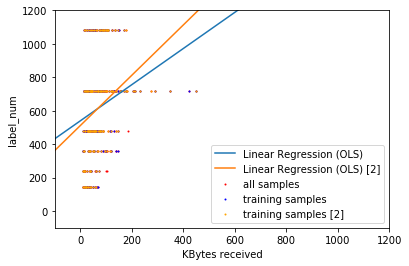

In [22]:
h_values = model.predict(interval_c)

ax.scatter(X_train,y_train,color='orange',s=1, 
           label="training samples [2]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [2]")
ax.legend()
fig

Let's train again a model on a different training set

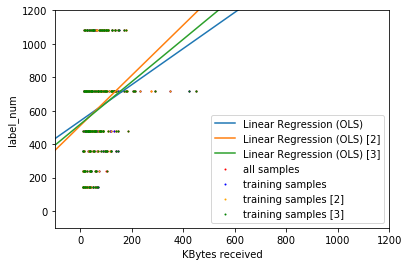

In [23]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=3)

X_train = df_train[['KBytesReceived'] ]
y_train = df_train['label_num']
X_test = df_test[[ 'KBytesReceived'] ]
y_test = df_test['label_num']

X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_c).fit() # Training
h_values = model.predict(interval_c)
ax.scatter(X_train,y_train,color='green',s=1, 
           label="training samples [3]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [3]")
ax.legend()
fig




### Use transformed variables

We observe that the values of `KBytesReceived` are squashed toward small values (we also checked it with a histogram in the last notebook). We have shown in the last notebook that in this case a log transformation can unveil correlation.

We now show that it also improves the model. First, have a look at the plot

[Text(0, 0.5, 'label_num'), Text(0.5, 0, 'KBytesReceived_log')]

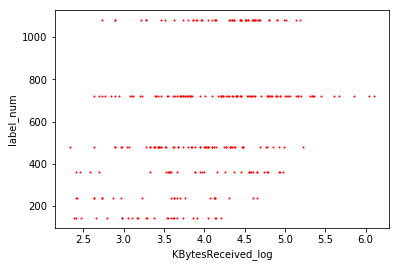

In [22]:
fig, ax = plt.subplots()
ax.scatter(df['KBytesReceived_log'],df['label_num'],color='red',s=1)
ax.set(ylabel="label_num",xlabel="KBytesReceived_log")

Let's train the new model

In [23]:
X_train = df_train[['KBytesReceived_log'] ]
X_test = df_test[['KBytesReceived_log'] ]

X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()

Let's plot the corresponding line

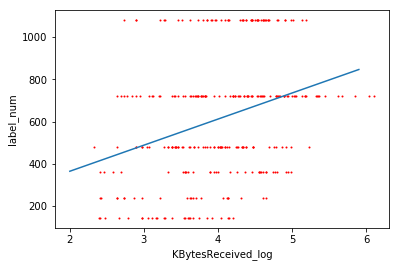

In [24]:
interval = np.arange(2,6,0.1)
interval_c = sm.add_constant(interval)
h_values = model.predict(interval_c)
ax.plot(interval, h_values, label="transformed model")
fig

Let's check the test error

In [25]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)
RMSE_1_feature = math.sqrt(mean_squared_error(y_test, y_pred) )
RMSE_1_feature

268.55219885344326

Using the logarithmic transformation, we improved the model.

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     22.84
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           3.39e-06
Time:                        15:35:31   Log-Likelihood:                -1439.2
No. Observations:                 204   AIC:                             2882.
Df Residuals:                     202   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                118.3754    104.580      1.132      0.259     -87.832     324.583
KBytesReceived_log   123.5323     25.850      4.779      0.000      72.562     174.503
==============================================================================
Omnibus:                       17.210   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.465
Skew:                           0.356   Prob(JB):                      0.00880
Kurtosis:                       2.220   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multivariate Linear Regression

Can we improve the test loss if we use other features?

Have a first look at the more correlated features (see notebook on data exploration)

In [27]:
corrmatrix = df.corr().round(3)
corr_to_label_num = corrmatrix['label_num']
# We sort based on the absolute value (see https://stackoverflow.com/a/30486411/2110769)
corr_to_label_num.reindex(corr_to_label_num.abs().sort_values(ascending=False).index)

label_num              1.000
EpochTime             -0.408
StartTime             -0.408
PacketsSent            0.384
PacketsSent0           0.363
BytesReceived_log      0.340
KBytesReceived_log     0.340
PacketsReceived_log    0.336
BytesSent0             0.297
BytesReceived          0.264
KBytesReceived         0.264
PacketsSent_log        0.257
PacketsReceived        0.252
BytesSent3            -0.234
BytesSent              0.225
BytesReceived0         0.203
PacketsReceived0       0.199
BytesSent4            -0.182
PacketsSent3          -0.148
PacketsSent1           0.136
PlaybackProgress      -0.133
BytesSent6            -0.130
BytesSent15           -0.122
PacketsSent15         -0.120
PacketsReceived1       0.107
BytesReceived1         0.106
PacketsSent4          -0.105
BufferHealth           0.104
BytesSent1             0.104
BytesReceived5        -0.099
                       ...  
PacketsSent20            NaN
PacketsReceived20        NaN
BytesSent20              NaN
BytesReceived2

Let's add `StartTime` among the regressors

In [28]:
cols = ['KBytesReceived_log', 'StartTime']
X_train = df_train[cols ]
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     22.77
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           3.49e-06
Time:                        15:35:31   Log-Likelihood:                -1439.2
No. Observations:                 204   AIC:                             2882.
Df Residuals:                     202   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0289      0.006      4.809      0.000       0.017       0.041
KBytesReceived_log   124.2161     25.830      4.809      0.000      73.285     175.147
StartTime           7.599e-11   6.87e-11      1.106      0.270   -5.95e-11    2.12e-10
==============================================================================
Omnibus:                       17.150   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.455
Skew:                           0.356   Prob(JB):                      0.00885
Kurtosis:                       2.221   Cond. No.                     1.72e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_test = df_test[cols ]
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)

In [30]:
MSE = mean_squared_error(y_test, y_pred)
RMSE_some_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_some_features, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE now:  268.5379993855423 ; RMSE with one feature:  297.876465422235


We improved our RMSE by also considering `StartTime` ... BUT ...

**Attention**: The correlation between `StartTime` and the label is __artificial__, just because the experimenter first measured low quality video sessions and then high quality. This would not be true in a real deployment


**DO NOT BE OBSESSED BY REDUCING THE ERROR, AND LOOK AT THE MEANING OF FEATURES!**

Let's add other correlated features

In [31]:
cols=['PacketsSent', 'KBytesReceived_log', 'PacketsReceived_log']

X_train = df_train[cols]
X_test = df_test[cols]

In [32]:
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.03
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           2.46e-08
Time:                        15:35:31   Log-Likelihood:                -1430.6
No. Observations:                 204   AIC:                             2869.
Df Residuals:                     200   BIC:                             2883.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 297.7369    109.629      2.716      0.007      81.559     513.915
PacketsSent             5.0637      1.212      4.177      0.000       2.673       7.454
KBytesReceived_log    -32.2476    159.920     -0.202      0.840    -347.593     283.097
PacketsReceived_log    90.4637    166.725      0.543      0.588    -238.301     419.228
==============================================================================
Omnibus:                        9.198   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.602
Skew:                           0.318   Prob(JB):                       0.0368
Kurtosis:                       2.389   Cond. No.                         341.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)
MSE = mean_squared_error(y_test, y_pred)
RMSE_few_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_few_features, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE now:  263.9484263293869 ; RMSE with one feature:  297.876465422235


We improved a bit

What if we take all the numeric features?

In [35]:
# Trick from https://stackoverflow.com/a/51684628/2110769
cols = df_train.select_dtypes([np.number]).columns
cols

Index(['RelativeTime', 'PacketsSent', 'PacketsReceived', 'BytesSent',
       'BytesReceived', 'PacketsSent0', 'PacketsReceived0', 'BytesSent0',
       'BytesReceived0', 'PacketsSent1',
       ...
       'BufferHealth', 'BufferProgress', 'KBytesReceived', 'label_num',
       'KBytesReceived_log', 'PacketsSent_log', 'PacketsReceived_log',
       'BytesSent_log', 'BytesReceived_log', 'BufferProgress_log'],
      dtype='object', length=140)

To construct our X_train and X_test, we should remove the target `label_num` and the "artificial features".

In [36]:
cols = cols.drop(['label_num', 'StartTime', 'EpochTime' ] )

In [37]:
X_train = df_train[cols]
X_test = df_test[cols]

X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()
model.summary()

/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3.758
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           5.19e-11
Time:                        15:35:31   Log-Likelihood:                -1353.5
No. Observations:                 204   AIC:                             2829.
Df Residuals:                     143   BIC:                             3032.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
RelativeTime            5.8463      2.351      2.487      0.014       1.199      10.494
PacketsSent            88.2742     52.532      1.680      0.095     -15.565     192.114
PacketsReceived     -1034.0938   2210.599     -0.468      0.641   -5403.767    3335.579
BytesSent              10.2562     11.624      0.882      0.379     -12.720      33.233
BytesReceived           9.5655     22.270      0.430      0.668     -34.455      53.586
PacketsSent0          -74.2672     53.337     -1.392      0.166    -179.698      31.164
PacketsReceived0     1053.0249   2210.033      0.476      0.634   -3315.531    5421.581
BytesSent0            -10.4142     11.621     -0.896      0.372     -33.384      12.556
BytesReceived0         -9.5800     22.269     -0.430      0.668     -53.600      34.440
PacketsSent1          -65.1791     52.664     -1.238      0.218    -169.279      38.921
PacketsReceived1      968.6417   2208.515      0.439      0.662   -3396.913    5334.196
BytesSent1            -10.3662     11.657     -0.889      0.375     -33.409      12.677
BytesReceived1         -9.5234     22.268     -0.428      0.670     -53.541      34.494
PacketsSent2          -63.2601     55.565     -1.138      0.257    -173.095      46.574
PacketsReceived2      978.5710   2216.434      0.442      0.660   -3402.637    5359.779
BytesSent2            -10.1933     11.643     -0.875      0.383     -33.208      12.822
BytesReceived2         -9.5410     22.273     -0.428      0.669     -53.569      34.487
PacketsSent3         -117.3106     96.224     -1.219      0.225    -307.516      72.895
PacketsReceived3     1092.6383   2224.123      0.491      0.624   -3303.768    5489.045
BytesSent3            -10.2603     11.656     -0.880      0.380     -33.301      12.780
BytesReceived3         -9.6007     22.278     -0.431      0.667     -53.638      34.437
PacketsSent4           11.0604    104.176      0.106      0.916    -194.863     216.983
PacketsReceived4     1154.9732   2223.109      0.520      0.604   -3239.429    5549.375
BytesSent4            -10.9446     11.678     -0.937      0.350     -34.029      12.140
BytesReceived4         -9.6797     22.277     -0.435      0.665     -53.714      34.354
PacketsSent5         -194.6589    209.809     -0.928      0.355    -609.387     220.070
PacketsReceived5     1499.5363   1942.014      0.772      0.441   -2339.228    5338.300
BytesSent5            -10.3314     11.631     -0.888      0.376     -33.321      12.659
BytesReceived5        -10.2214     22.095     -0.463      0.644     -53.897      33.454
PacketsSent6           40.3667    184.277      0.219      0.827    -323.893     404.626
PacketsReceived6     1093.0407   2252.790      0.485      0.628   -3360.032    5546.114
BytesSent6            -11.6289     11.576     -1.005      0.317     -34.511      11.254
Byt

Let's deal with the warnings later. Let's just test the model.

In [38]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test)
RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE now: ', RMSE_all_features, '; RMSE with some features: ',
      RMSE_some_features)


RMSE now:  1052.5103207226603 ; RMSE with some features:  268.5379993855423


What? We use more features and we obtain a worse model?

## Correct a bad model

Note that no coefficient is significant (look at the p-value). The model is "rubbish".



Remember that
$$
    \boldsymbol{\theta}^* = (X^T X)^{-1} X^T \textbf{y}
$$

Is $X^T X$ invertible?

### Constant features

In [39]:
import feature_engineering # From the course library
help(feature_engineering)


Help on module feature_engineering:

NAME
    feature_engineering

FUNCTIONS
    get_features_correlated_to_target(df, target_feature)
        Returns the Pearson's correlation coefficient between the 
        features and the target
        
        Parameters
        ------------
        df_: dataframe
        
        target_feature: string
                the name of the target feature
        
        Returns
        --------------
        Series
                A series of features, with the Person's correlation 
                coefficient between them and the target, ordered in decreasing
                oder of correlation
    
    get_most_correlated(df)
        Returns the pairs of features in descending order of Person's 
        correlation
        
        Parameters
        --------------
        df: dataframe
        
        Returns
        -------------
        Series
                the pair of features and the Pearson's coefficient
    
    low_var_features(df, thre

In [40]:
non_constant_features = \
    feature_engineering.low_var_features(df_train[cols], threshold=0)
non_constant_features

['RelativeTime',
 'PacketsSent',
 'PacketsReceived',
 'BytesSent',
 'BytesReceived',
 'PacketsSent0',
 'PacketsReceived0',
 'BytesSent0',
 'BytesReceived0',
 'PacketsSent1',
 'PacketsReceived1',
 'BytesSent1',
 'BytesReceived1',
 'PacketsSent2',
 'PacketsReceived2',
 'BytesSent2',
 'BytesReceived2',
 'PacketsSent3',
 'PacketsReceived3',
 'BytesSent3',
 'BytesReceived3',
 'PacketsSent4',
 'PacketsReceived4',
 'BytesSent4',
 'BytesReceived4',
 'PacketsSent5',
 'PacketsReceived5',
 'BytesSent5',
 'BytesReceived5',
 'PacketsSent6',
 'PacketsReceived6',
 'BytesSent6',
 'BytesReceived6',
 'PacketsSent7',
 'PacketsReceived7',
 'BytesSent7',
 'BytesReceived7',
 'PacketsSent8',
 'PacketsReceived8',
 'BytesSent8',
 'BytesReceived8',
 'PacketsSent9',
 'PacketsReceived9',
 'BytesSent9',
 'BytesReceived9',
 'PacketsSent12',
 'PacketsReceived12',
 'BytesSent12',
 'BytesReceived12',
 'PacketsSent13',
 'PacketsReceived13',
 'BytesSent13',
 'BytesReceived13',
 'PacketsSent15',
 'PacketsReceived15',
 'B

We must only use non-constant features

In [41]:
X_train = df_train[non_constant_features]
X_test = df_test[non_constant_features]

X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3.758
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           5.19e-11
Time:                        15:35:32   Log-Likelihood:                -1353.5
No. Observations:                 204   AIC:                             2829.
Df Residuals:                     143   BIC:                             3032.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.281e+07   2.46e+07      0.929      0.354   -2.57e+07    7.13e+07
RelativeTime            5.8463      2.351      2.487      0.014       1.199      10.494
PacketsSent            76.4455     50.727      1.507      0.134     -23.826     176.717
PacketsReceived     -1034.0938   2210.599     -0.468      0.641   -5403.767    3335.579
BytesSent              -0.4591      0.546     -0.841      0.402      -1.538       0.620
BytesReceived           9.5656     22.270      0.430      0.668     -34.455      53.586
PacketsSent0          -62.4384     51.400     -1.215      0.226    -164.041      39.164
PacketsReceived0     1053.0249   2210.033      0.476      0.634   -3315.531    5421.581
BytesSent0              0.3011      0.549      0.549      0.584      -0.783       1.385
BytesReceived0         -9.5800     22.269     -0.430      0.668     -53.600      34.440
PacketsSent1          -53.3503     51.366     -1.039      0.301    -154.885      48.185
PacketsReceived1      968.6417   2208.515      0.439      0.662   -3396.913    5334.196
BytesSent1              0.3490      0.565      0.618      0.537      -0.767       1.465
BytesReceived1         -9.5234     22.268     -0.428      0.670     -53.541      34.494
PacketsSent2          -51.4314     54.535     -0.943      0.347    -159.231      56.368
PacketsReceived2      978.5710   2216.434      0.442      0.660   -3402.637    5359.779
BytesSent2              0.5220      0.636      0.821      0.413      -0.735       1.779
BytesReceived2         -9.5410     22.273     -0.428      0.669     -53.569      34.487
PacketsSent3         -105.4818     96.107     -1.098      0.274    -295.456      84.492
PacketsReceived3     1092.6383   2224.123      0.491      0.624   -3303.768    5489.045
BytesSent3              0.4549      0.645      0.706      0.481      -0.819       1.729
BytesReceived3         -9.6007     22.278     -0.431      0.667     -53.638      34.437
PacketsSent4           22.8892    105.672      0.217      0.829    -185.992     231.770
PacketsReceived4     1154.9732   2223.109      0.520      0.604   -3239.429    5549.375
BytesSent4             -0.2294      0.648     -0.354      0.724      -1.510       1.051
BytesReceived4         -9.6797     22.277     -0.435      0.665     -53.714      34.354
PacketsSent5         -182.8302    209.940     -0.871      0.385    -597.817     232.157
PacketsReceived5     1499.5363   1942.014      0.772      0.441   -2339.228    5338.300
BytesSent5              0.3838      0.579      0.662      0.509      -0.761       1.529
BytesReceived5        -10.2214     22.095     -0.463      0.644     -53.897      33.454
PacketsSent6           52.1955    182.513      0.286      0.775    -308.577     412.968
PacketsReceived6     1093.0407   2252.790      0.485      0.628   -3360.032    5546.114
Byt

The warnings disappear. Still, coefficients are no significant

In [42]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

RMSE:  1145.0099952066987


As expected, the performance is bad.

### Collinearity

Let's check the most correlated features

In [43]:
most_corr_feats = \
    feature_engineering.get_most_correlated(
            df_train[non_constant_features])
most_corr_feats

PacketsReceived12    BytesReceived12        1.000
PacketsReceived13    BytesReceived13        1.000
BufferProgress       BufferProgress_log     1.000
BytesReceived        KBytesReceived         1.000
PacketsReceived8     BytesReceived8         1.000
KBytesReceived_log   BytesReceived_log      1.000
PacketsReceived15    BytesReceived15        1.000
PacketsSent25        BytesSent25            0.999
PacketsReceived0     BytesReceived0         0.999
PacketsSent13        PacketsReceived13      0.998
                     BytesReceived13        0.998
PacketsReceived25    BytesReceived25        0.997
PacketsReceived1     BytesReceived1         0.997
PacketsSent13        BytesSent13            0.996
PacketsSent8         BytesSent8             0.995
PacketsReceived2     BytesReceived2         0.994
PacketsReceived      KBytesReceived         0.993
                     BytesReceived          0.993
PacketsSent15        BytesSent15            0.992
PacketsReceived13    BytesSent13            0.989


As expected, packets received/set and bytes received/set are highly correlated. Also the variables transformed to log are correlated with the original ones. We can remove the original ones. If we have KBytes, we can remove Bytes

In [44]:
to_remove = ['PacketsReceived8',
        'PacketsReceived15', 'PacketsReceived13',
          'BytesReceived','BytesReceived_log','BufferProgress',
          'PacketsReceived0', 'PacketsSent25', 'PacketsReceived25'
            ]

# Take from non_constant_features all the features except the ones in
# to_remove
cols_1 = []
for feat in non_constant_features:
    if feat not in to_remove:
        cols_1.append(feat)
        
        
X_train = df_train[cols_1]
X_test = df_test[cols_1]
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3.674
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.65e-10
Time:                        15:35:32   Log-Likelihood:                -1360.8
No. Observations:                 204   AIC:                             2836.
Df Residuals:                     147   BIC:                             3025.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 540.6574    347.515      1.556      0.122    -146.114    1227.429
RelativeTime            5.1428      2.359      2.180      0.031       0.480       9.805
PacketsSent           793.9222    512.914      1.548      0.124    -219.716    1807.560
PacketsReceived         4.4504      8.830      0.504      0.615     -12.999      21.900
BytesSent              -1.8098      1.238     -1.462      0.146      -4.255       0.636
PacketsSent0         -779.3447    513.280     -1.518      0.131   -1793.705     235.016
BytesSent0              1.6462      1.244      1.324      0.188      -0.811       4.104
BytesReceived0          0.7102      1.002      0.709      0.480      -1.270       2.690
PacketsSent1         -774.9165    512.386     -1.512      0.133   -1787.510     237.677
PacketsReceived1      -51.9312     60.838     -0.854      0.395    -172.161      68.299
BytesSent1              1.6822      1.233      1.364      0.175      -0.755       4.120
BytesReceived1          0.7457      1.009      0.739      0.461      -1.248       2.739
PacketsSent2         -777.1960    515.204     -1.509      0.134   -1795.359     240.967
PacketsReceived2      -35.2584     75.950     -0.464      0.643    -185.353     114.837
BytesSent2              1.8889      1.277      1.479      0.141      -0.635       4.413
BytesReceived2          0.7229      1.007      0.718      0.474      -1.268       2.713
PacketsSent3         -862.4740    518.586     -1.663      0.098   -1887.321     162.373
PacketsReceived3       68.2532     73.608      0.927      0.355     -77.213     213.719
BytesSent3              1.9183      1.283      1.496      0.137      -0.617       4.453
BytesReceived3          0.6811      1.001      0.681      0.497      -1.296       2.658
PacketsSent4         -707.3428    520.702     -1.358      0.176   -1736.372     321.686
PacketsReceived4      114.5381    130.652      0.877      0.382    -143.662     372.738
BytesSent4              1.0072      1.276      0.789      0.431      -1.514       3.529
BytesReceived4          0.6112      1.023      0.598      0.551      -1.410       2.632
PacketsSent5         -951.3242    560.636     -1.697      0.092   -2059.272     156.623
PacketsReceived5      616.7071    289.609      2.129      0.035      44.371    1189.043
BytesSent5              1.7879      1.234      1.449      0.149      -0.650       4.226
BytesReceived5          0.0081      0.975      0.008      0.993      -1.919       1.935
PacketsSent6         -627.1954    551.347     -1.138      0.257   -1716.785     462.394
PacketsReceived6       68.8179    295.327      0.233      0.816    -514.817     652.453
BytesSent6              0.1898      1.418      0.134      0.894      -2.612       2.991
BytesReceived6          0.8058      1.374      0.586      0.558      -1.910       3.521
Pac

In [45]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  489.0594712231686 ; RMSE with one feature:  297.876465422235


After removing the most correlated features, the model improved a bit. Still, the model with one feature only is better.

Let's check the correlation among the remaining features.

In [46]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_1])
most_corr_feats

PacketsReceived12   BytesReceived12        1.000
PacketsSent13       BytesReceived13        0.998
PacketsReceived1    BytesReceived1         0.997
PacketsSent13       BytesSent13            0.996
PacketsSent8        BytesSent8             0.995
PacketsReceived2    BytesReceived2         0.994
PacketsReceived     KBytesReceived         0.993
PacketsSent15       BytesSent15            0.992
BytesSent13         BytesReceived13        0.989
PacketsReceived12   BytesSent12            0.988
BytesSent12         BytesReceived12        0.988
PacketsSent8        BytesReceived8         0.988
KBytesReceived_log  PacketsReceived_log    0.987
PacketsSent12       BytesSent12            0.986
BytesSent8          BytesReceived8         0.985
PacketsReceived4    BytesReceived4         0.981
PacketsSent1        BytesSent1             0.979
PacketsSent0        BytesSent0             0.975
PacketsReceived3    BytesReceived3         0.967
PacketsSent1        PacketsReceived1       0.963
PacketsSent15       

Let's remove all the features regarding Packets (as they are highly correlated with Bytes). Still, preserve the ones that have high correlation with the target.

In [56]:
feature_engineering.get_features_correlated_to_target(
                    df_train[cols_1+['label_num']], 'label_num')

label_num              1.00
PacketsSent            0.40
PacketsSent0           0.37
PacketsReceived_log    0.32
KBytesReceived_log     0.32
PacketsSent_log        0.30
BytesSent0             0.30
KBytesReceived         0.26
PacketsReceived        0.25
BytesSent3            -0.25
BytesSent              0.24
BytesReceived0         0.19
PacketsSent3          -0.18
BytesSent4            -0.16
PacketsReceived1       0.15
BytesReceived1         0.15
BytesSent15           -0.14
PacketsSent1           0.14
PlaybackProgress      -0.14
PacketsSent15         -0.13
BytesSent1             0.12
BytesReceived5        -0.12
BytesSent6            -0.12
BytesReceived15       -0.11
BytesSent7            -0.10
BufferProgress_log     0.09
RelativeTime           0.09
BufferHealth           0.08
PacketsSent4          -0.08
PacketsReceived5      -0.08
                       ... 
PacketsReceived6       0.07
BytesSent8            -0.06
BytesReceived8        -0.06
PacketsReceived3      -0.06
PacketsSent12       

In [58]:
to_preserve = ['PacketsSent','PacketsSent0','PacketsReceived_log',
               'PacketsSent_log'
]

cols_2 = []
for feat in cols_1:
    if 'Packets' not in feat:
        cols_2.append(feat)
        
cols_2 = cols_2 + to_preserve

In [59]:
X_train = df_train[cols_2]
X_test = df_test[cols_2]
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              label_num   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     4.747
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           6.44e-13
Time:                        15:40:41   Log-Likelihood:                -1371.3
No. Observations:                 204   AIC:                             2825.
Df Residuals:                     163   BIC:                             2961.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 525.5257    311.281      1.688      0.093     -89.137    1140.188
RelativeTime            2.7719      1.553      1.784      0.076      -0.295       5.839
BytesSent               0.3905      0.267      1.463      0.146      -0.137       0.918
BytesSent0             -0.5567      0.275     -2.027      0.044      -1.099      -0.014
BytesReceived0         -0.4381      0.767     -0.571      0.569      -1.953       1.077
BytesSent1             -0.6751      0.272     -2.479      0.014      -1.213      -0.137
BytesReceived1         -0.4366      0.767     -0.569      0.570      -1.952       1.078
BytesSent2             -0.4924      0.270     -1.822      0.070      -1.026       0.041
BytesReceived2         -0.4471      0.767     -0.583      0.561      -1.961       1.067
BytesSent3             -0.5534      0.282     -1.960      0.052      -1.111       0.004
BytesReceived3         -0.4449      0.767     -0.580      0.563      -1.959       1.069
BytesSent4             -0.6938      0.335     -2.070      0.040      -1.356      -0.032
BytesReceived4         -0.4399      0.767     -0.573      0.567      -1.955       1.075
BytesSent5             -0.5084      0.302     -1.684      0.094      -1.105       0.088
BytesReceived5         -0.8353      0.788     -1.060      0.291      -2.391       0.720
BytesSent6             -0.7433      0.458     -1.622      0.107      -1.648       0.161
BytesReceived6          0.1271      1.031      0.123      0.902      -1.909       2.163
BytesSent7             -0.6244      0.447     -1.396      0.165      -1.508       0.259
BytesReceived7         -0.5511      0.780     -0.706      0.481      -2.092       0.990
BytesSent8              0.5867      0.818      0.717      0.474      -1.029       2.202
BytesReceived8         -0.9049      0.849     -1.065      0.288      -2.582       0.773
BytesSent9              1.0961      0.975      1.125      0.262      -0.828       3.020
BytesReceived9         -0.6639      0.794     -0.836      0.404      -2.232       0.904
BytesSent12             5.8529      3.292      1.778      0.077      -0.647      12.353
BytesReceived12       -20.6651     10.900     -1.896      0.060     -42.188       0.858
BytesSent13            -0.7787      0.703     -1.107      0.270      -2.167       0.610
BytesReceived13        -0.4825      0.852     -0.566      0.572      -2.166       1.201
BytesSent15            -0.9049      0.693     -1.307      0.193      -2.273       0.463
BytesReceived15        -0.2987      4.059     -0.074      0.941      -8.315       7.717
BytesSent25            -0.6141      0.354     -1.732      0.085      -1.314       0.086
BytesReceived25        -0.4371      0.767     -0.570      0.570      -1.952       1.078
PlaybackProgress    -2352.4879   1595.523     -1.474      0.142   -5503.046     798.070
Len

The significance of some features is reinforced, but in general significance is weak.

In [60]:
X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  6714.577335488012 ; RMSE with one feature:  297.876465422235


Performance is still bad. Let's remove other highly correlated features.

In [62]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_2])
most_corr_feats

BytesSent13         BytesReceived13        0.989
BytesSent12         BytesReceived12        0.988
KBytesReceived_log  PacketsReceived_log    0.987
BytesSent8          BytesReceived8         0.985
BytesSent0          PacketsSent0           0.975
BytesSent           PacketsSent            0.936
PacketsSent         PacketsSent0           0.909
BufferHealth        BufferProgress_log     0.901
BytesSent15         BytesReceived15        0.901
BytesSent1          BytesReceived1         0.891
BytesSent_log       PacketsSent_log        0.891
BytesSent0          PacketsSent            0.886
KBytesReceived      PacketsReceived_log    0.878
                    KBytesReceived_log     0.870
BytesSent0          BytesReceived0         0.860
BytesSent9          BytesReceived13        0.858
BytesSent           BytesSent0             0.853
BytesSent9          BytesSent13            0.848
BytesReceived0      PacketsSent0           0.843
BytesSent           PacketsSent0           0.823
BytesSent2          

In [65]:
to_remove = ['BytesReceived13','BytesReceived12','PacketsReceived_log',
             'BytesReceived8','PacketsSent0','PacketsSent',
             'BufferProgress_log','BytesReceived15','BytesReceived1',
             'PacketsSent_log','PacketsSent'
            ]

cols_3 = []
for feat in cols_2:
    if feat not in to_remove:
        cols_3.append(feat)
        
X_train = df_train[cols_3]
X_test = df_test[cols_3]
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c).fit()

X_test_c = sm.add_constant(X_test)
y_pred = model.predict(X_test_c)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  261.7949388176661 ; RMSE with one feature:  297.876465422235


We finally have a better model than the initial univariate one!